## 실습을 통한 이해

In [3]:
from eunjeon import Mecab
from tqdm import tqdm_notebook
import pandas as pd
from konlpy.tag import Mecab
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [2]:
mecab = Mecab()

In [3]:
data = pd.read_csv('평점상위100개기업.csv', index_col=['Unnamed: 0'])
data

,기업,평점,제목,장점,단점
0,페이스북코리아(유),4.7,"""합리적인 회사 생활. 인풋과 아웃풋의 조화. 국내 대기업과는 완전히 다르다.""","괜찮은 대우, 논리가 통하고 일에 집중 할 수 있게 한다. 시설도 좋고 전체적으로 ...",처음에 들어가면 아무도 챙겨주지 않는데 아마 이것이 외국계 회사의 특징이라 생각이 ...
1,페이스북코리아(유),4.7,"""누구나 알고있는 유명한 sns회사로써 확실히 다른곳과 다릅니다""","근무환경이 좋으며 분위기가 굉장히 자유롭고, 내 일에 집중할 수 있어서 좋은 곳입니다.",딱히 꼽을 것이 없지만 굳이 한가지를 꼽자면 컴퓨터를 보고 하는 일이기 때문에 본인...
2,페이스북코리아(유),4.7,"""대우좋고 보람있게 일할 수 있는 기업입니다 추천합니다""",분위기좋고 확실한 보상과 수직적이지 않는 분위기가 최고입니다,단점 그다지 별로 없는거같은데 굳이 생각하면 드가기가 너무 힘드네여
3,페이스북코리아(유),4.7,"""환경은 좋고 직원이 많지 않은데 점점 많아지고 있는추세인것같다.""",복지 복지 음료수 간식거리 공짜 좋은 환경의 오피스 괜찬은 연봉 등등등..........,계약직과 정규직의 차별이 있는 편이다. 대우면에서 나 평소에도...............
4,페이스북코리아(유),4.7,"""개발자가 대우받고 사람들이 굉장히 좋음 팀워크도 좋음""","윗사람 눈치 안보고 연차 사용, 점심 저녁 제공, 깔끔한 사무실 분위기 등등","낙하산 인사, 인맥... 너무 괴롭다. 일좀 하자... 제발..."
5,페이스북코리아(유),4.7,"""뭐랄까 굉장히 깨어있는 사람들과 같이 있는 느낌이었습니다. 물들어가는게 좋다랄까요 ?""",발빠른 판단과 협업이 이루어질 수 있는 분위기를 조성합니다. 또한 결과 성취에 너무...,보고를 위한 단계가 간소화되어 자칫 확인을 받아야 할 사항에 대해 쉽게 간과할 수 ...
6,페이스북코리아(유),4.7,"""대우받으며 보람차게 일할 수 있는 곳 입니다.""","좋은 분위기에서 자기 분야 전문성을 기를 수 있고, 사업 기반이 안정적이고 체계적인...",반복적 업무와 승진이 힘들다는 점이 있지만 큰 단점은 거의 없다고 봐도 무방합니다.
7,페이스북코리아(유),4.7,"""개발자가 대우받을수 있는곳 능력향상이 가능한곳""","연차를 눈치 안보고 쓸수 있음 출퇴근 자유로움,연봉이 높음",문서 작업이 많음 출퇴근이 자유로운대신 할업무가많음 회사자리가 좋지않음
8,페이스북코리아(유),4.7,"""다양한 환경을 개발하고 경험하며, 직원의 능력 향상을 위해 많은 노력을 기울이는 ...",연차사용에 자유롭다. 일단 자유로운 기업의 분위기가 형성되어 그 기업만의 독특한 업...,갑작스럽게 업무가 생기면 기한 내 일처리를 위해 야근을 하는 경우도 있고 집에서까지...
9,페이스북코리아(유),4.7,"""능력 발휘를 위한 좋은 장이 될 수 있을지도 몰라요""",개인의 역량 강화 및 스킬 향상에 상당한 이점이 있는 기업 입니다.,개인적인 분위기가 팀의 화합과 발전을 약간 저하 시키는 듯 합니다.


In [33]:
com_ls = data['기업'].drop_duplicates()
com_ls = com_ls.reset_index(drop=True)
com_ls

0             페이스북코리아(유)
1                 애터미(주)
2              라이엇게임즈코리아
3             (주)에이스프로젝트
4             드라마앤컴퍼니(주)
5            케이에스에스해운(주)
6                한국예탁결제원
7                 버즈빌(주)
8                 뤼이드(주)
9        유니티테크놀로지스코리아(유)
10         케이엘에이텐코코리아(주)
11                한국가스공사
12              구글코리아(유)
13        맥킨지인코포레이티드한국지점
14           (주)벡터코리아아이티
15             현대하이스코(주)
16                부산교통공사
17               삼성인력개발원
18              쎄트렉아이(주)
19                  한국선급
20              구 카카오(주)
21                대구텍(유)
22    퀄컴씨디엠에이테크날러지코리아(유)
23                  한국은행
24              한국무역보험공사
25             한국중부발전(주)
26             한국조세재정연구원
27             피앤피시큐어(주)
28             한국남동발전(주)
29               한국노동연구원
             ...        
70          에이에스엠엘코리아(주)
71            한국에너지기술연구원
72              (사)금융결제원
73          (재)한국지질자원연구원
74            에스케이텔레콤(주)
75             코닝정밀소재(주)
76            한국수력원자력(주)
77             한국코카콜라(유)
78                (주)카카오


In [5]:
result = []

for com in com_ls:
    result.append([com,' '.join(list(data.groupby('기업').get_group('{}'.format(com))['장점']))])

In [6]:
df_result = pd.DataFrame(result, columns=['기업명', '전체 리뷰'])
documents = list(df_result['전체 리뷰'])
documents

['괜찮은 대우, 논리가 통하고 일에 집중 할 수 있게 한다. 시설도 좋고 전체적으로 분위기가 밝다. 근무환경이 좋으며 분위기가 굉장히 자유롭고, 내 일에 집중할 수 있어서 좋은 곳입니다. 분위기좋고 확실한 보상과 수직적이지 않는 분위기가 최고입니다 복지 복지 음료수 간식거리 공짜 좋은 환경의 오피스 괜찬은 연봉 등등등..................... 윗사람 눈치 안보고 연차 사용, 점심 저녁 제공, 깔끔한 사무실 분위기 등등 발빠른 판단과 협업이 이루어질 수 있는 분위기를 조성합니다. 또한 결과 성취에 너무 많은 비중을 두고 진행되는 프로젝트를 많이 경험 할 수 있습니다. 좋은 분위기에서 자기 분야 전문성을 기를 수 있고, 사업 기반이 안정적이고 체계적인 교육 시스템이 갖춰져 있습니다. 연차를 눈치 안보고 쓸수 있음 출퇴근 자유로움,연봉이 높음 연차사용에 자유롭다. 일단 자유로운 기업의 분위기가 형성되어 그 기업만의 독특한 업무 방식을 낳는다. 서로간의 다양하고 허울없는 업무이야기가 기업의 장기적 발전에 상당히 많은 도움과 효율을 낼 수 있다고 볼 수 있다. 개인의 역량 강화 및 스킬 향상에 상당한 이점이 있는 기업 입니다. 프리한 근무 환경 좋은 사람들 연차가 자유로운 회사 복지가 좋은회사 유연한 근무환경, 다양한 복지혜택, 업계 최고 인재들과의 협업 기회 등 장점이 너무 많지만, 직원 개개인의 성장이 곧 회사의 발전이라고 믿고 실제로 이를 실행하는 수많은 사례들은 다른 회사에서 찾아보기 힘들다고 생각합니다. 무엇보다, 단단하고 촘촘하게 쌓아올린 건강한 문화와, 이를 지키기 위해서 끊임없이 스스로에게, 그리고 서로에게 질문을 던지는 사람들은 정말 최고입니다. 업무를 제대로 할 수만 있다면 업무의 방식, 시간, 장소에 구애받지 않고 결과물을 만들어 내는 것에만 집중할 수 있는 문화  어떤 이야기라도 할 수 있고,개인들의 의견을 최대한 반영하고자 하는 회사  뛰어난 능력을 보유한 동료를 만날 수 있는 곳  합리적인 상식이 통하는 곳 수평적이고 가족같은 회

In [8]:
news_df = pd.DataFrame({'document':documents})

# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Zㄱ-ㅎ가-힣]", " ")



In [9]:
for i in tqdm_notebook(range(len(news_df['clean_doc']))):
    news_df['clean_doc'][i] = mecab.nouns(news_df['clean_doc'][i])

In [10]:
for i in range(len(news_df['clean_doc'])):
    news_df['clean_doc'][i] = ' '.join([word for word in news_df['clean_doc'][i] if len(word) > 1])

In [11]:
news_df

,document,clean_doc
0,"괜찮은 대우, 논리가 통하고 일에 집중 할 수 있게 한다. 시설도 좋고 전체적으로 ...",대우 논리 집중 시설 전체 분위기 근무 환경 분위기 자유 집중 분위기 보상 수직 분...
1,"수평문화를 추구한다.(전직원 영어이름사용, 직급파괴) 각종 복지제도가 시행된다.(정...",수평 문화 추구 직원 영어 이름 사용 직급 파괴 각종 복지 제도 시행 정착금 기숙사...
2,수평적인 문화 활발한 커뮤니케이션 진취적인 마인드 많은 연봉 많은 연차 많은 휴가 ...,수평 문화 커뮤니케이션 진취 마인드 연봉 연차 휴가 연차 제한 연차 사람 눈치 사용...
3,연차를 윗사람 눈치 안보고 쓸 수 있음. 서로 존중해주는 분위기 복지나 일하는환경 ...,연차 윗사람 눈치 존중 분위기 복지 환경 업무 스트레스 자유 분위기 사원 자유 연차...
4,재택이라 시간 될때마다 할 수 있어서 좋음. 회시에서 노터치로 진짜 시간 날 때 하...,재택 시간 회시 노터치 시간 수평 사무실 분위기 연차 눈치 개인 참여 업무 범위 개...
5,한달에 한번 내지는 분기마다 전직원 컬처데이를 가짐.직원의 경조사에 관한 비용지원 ...,내지 분기 직원 컬처 데이 직원 경조사 비용 지원 신입 사원 본인 직무 관련 교육 ...
6,"연봉, 워라벨등 어느 하나 빠지는것이 없었음. 최고의 회사라고 생각함 급여 뿐만 아...",연봉 워라 하나 최고 회사 생각 급여 복지 자유 분위기 사람 경쟁 편안 마음 여유 ...
7,1. 동료 2. 수평적인 사내 문화 3. 회사의 방향성과 목표를 명확히 확립하고 잘...,동료 수평 사내 문화 회사 방향 목표 확립 공유 리더 자기 개발 비용 지원 대부분 ...
8,"자유로운 출퇴근, 연차사용. 좋은 동료들! 업무강도는 쎄지만 배울것도 많고 빠르게 ...",자유 출퇴근 연차 사용 동료 업무 강도 성장 의견 적극 팀원 수평 분위기 대부분 오...
9,"능동적으로 일을 찾아서, 제안하고 개발하기 참 좋다. 개인의 업무 자율성을 존중, ...",능동 제안 개발 개인 업무 자율 존중 보장 나이스 사람 놀이 놀이 사람 사람 재산 ...


In [21]:
stop_words = ['연봉','워라', '기업']
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [22]:
ls_token_doc = list(tokenized_doc)

In [23]:
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []

for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [26]:
detokenized_doc

['대우 논리 집중 시설 전체 분위기 근무 환경 분위기 자유 집중 분위기 보상 수직 분위기 최고 복지 복지 음료수 간식거리 공짜 환경 오피스 등등 윗사람 눈치 연차 사용 점심 저녁 제공 사무실 분위기 등등 판단 협업 분위기 조성 결과 성취 비중 진행 프로젝트 경험 분위기 자기 분야 전문 사업 기반 안정 체계 교육 시스템 연차 눈치 출퇴근 자유 연차 사용 자유 자유 분위기 형성 독특 업무 방식 다양 허울 업무 이야기 장기 발전 도움 효율 개인 역량 강화 스킬 향상 상당 이점 프리 근무 환경 사람 연차 자유 회사 복지 회사 근무 환경 다양 복지 혜택 업계 최고 인재 협업 기회 장점 직원 개개인 성장 회사 발전 실행 사례 회사 생각 무엇 문화 스스로 서로 질문 사람 최고 업무 업무 방식 시간 장소 구애 결과물 집중 문화 이야기 개인 의견 최대한 반영 회사 능력 보유 동료 합리 상식 수평 가족 회사 분위기 자유 근무 복지 혜택 페이스북 본사 중요 생각 가치 페이스북 코리아 주도 자율 자신 업무 사람 문제 필요 에너지 생각 페이스북 신뢰 동료 회사 동료 가족 개인 고민 필요 최대한 지원 프리 근무 환경 사람 연차 자유 회사 복지 회사 근무 환경 다양 복지 혜택 업계 최고 인재 협업 기회 장점 직원 개개인 성장 회사 발전 실행 사례 회사 생각 무엇 문화 스스로 서로 질문 사람 최고 글로벌 회사 분위기 자유 단점 아래 언제 이용 간식 각종 음료 시작 자유 휴가 제도 상하 관계 파트너십 조직 문화 걱정 업무 집중 회사 배려 장점 환경 가시 임팩트 성장 매니저 상의 연차 회사 결정 실행 출퇴근 시간 자유 책임 수평 문화 최고봉 권장 자율 처리 사람 중시 중요 가치 성장 스스로 계발 사회 조직 장점 극대 방식 업무 가능 방식 방식 성과 극대 기회 회사 직원 신뢰 근태 상대 성과 만족 회사 개인 성장 기회 리더 레벨 서포트 기회 복지 능력 대우 자유 개개인 의사 표현 세계 흐름 느낌 외국 회사 자유 분위기 미국 실리콘 벨리 내부 인테리어 직원 업무 조금 불편 최고 서비스 간식 기

In [28]:
vec = CountVectorizer()
X = vec.fit_transform(detokenized_doc)
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df

,가게,가격,가공,가구,가까이,가능,가담,가도,가라,가량,...,흡연실,흡연자,흥미,희롱,희망,희생,희석,희소,히든카드,히스토리
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
kmeans = KMeans(n_clusters=5).fit(df)
cluster = kmeans.predict(df)
print('cluster =', cluster)
kmeans.labels_  #K-Means 군집 분석 결과 3가지로 추출됨.
print('label_ =', kmeans.labels_)

cluster = [0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 2 1 1 0 0 1 0 2 1 0 1 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 2 1 1 1 0 1 1 0 1 2 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 1 3 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 4 1 0 0 0 0]
label_ = [0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 2 1 1 0 0 1 0 2 1 0 1 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 2 1 1 1 0 1 1 0 1 2 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 1 3 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 4 1 0 0 0 0]


In [55]:
df_com = pd.DataFrame(com_ls, columns=['기업'])

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principalDf.index=df_com['기업']
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
기업,,,,,
페이스북코리아(유),-10.781294,18.345064,-10.227113,-0.178067,-8.573134
애터미(주),-40.156717,5.551962,3.935773,8.719625,4.391811
라이엇게임즈코리아,-27.713995,7.921881,-2.850249,0.816583,-9.458730
(주)에이스프로젝트,-18.572578,13.589701,-1.877967,-0.501571,-2.192030
드라마앤컴퍼니(주),-35.038063,4.975919,-1.068445,8.000220,-2.098257
케이에스에스해운(주),-37.289751,5.771222,6.789265,9.721057,5.056632
한국예탁결제원,-17.779102,-9.336649,2.765682,14.091356,0.805866
버즈빌(주),-37.245822,1.539501,0.293025,0.844337,-3.361399
뤼이드(주),-43.103282,2.817311,3.765461,-1.659405,-0.123227


In [57]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0])

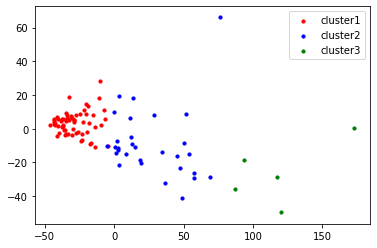

In [58]:
kmeans.labels_ == 0

# x축 : first
# y축 : second 번호로 나타낸후 plot으로 시각화
plt.scatter(principalDf.iloc[kmeans.labels_ == 0, 0], principalDf.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red', label = 'cluster1')
plt.scatter(principalDf.iloc[kmeans.labels_ == 1, 0], principalDf.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(principalDf.iloc[kmeans.labels_ == 2, 0], principalDf.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()

In [45]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df, cluster)
print('Silhoutte Score =', score)

Silhoutte Score = 0.4776739470011285
